<a href="https://colab.research.google.com/github/Marwenboughanmi/EVS-project-1/blob/main/percent_EVs_vs_Oil_Cunsumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install the required libraries
!pip install prophet

In [2]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# Import files that we'll be using
from google.colab import files
ev_data_file = files.upload()
oil_consumption_file = files.upload()

Saving share-car-stocks-electric.csv to share-car-stocks-electric (1).csv


Saving US_Norway_MotorOilConsumption.csv to US_Norway_MotorOilConsumption.csv


In [15]:
# Create a data frame from the ev data
ev_df = pd.read_csv("share-car-stocks-electric.csv")
ev_df = ev_df.set_index('Year')
ev_df=ev_df.rename(columns={'Share of car stocks that are electric':'% of Cars that are EVs', 'Entity': 'Country'})
del ev_df['Code']

# Display the ev dataframe
display(ev_df.head())
display(ev_df.tail())

,Country,% of Cars that are EVs
Year,,
2011,Australia,0.00039
2012,Australia,0.00240
2013,Australia,0.00460
2014,Australia,0.01400
2015,Australia,0.02700


,Country,% of Cars that are EVs
Year,,
2019,World,0.60
2020,World,0.84
2021,World,1.30
2022,World,2.10
2023,World,3.20


In [46]:
#find the countires with the highest percentage of EVs
ev_data_2023 = ev_df.loc[ev_df.index == 2023]
ev_data_2023 = ev_data_2023.sort_values(by=['% of Cars that are EVs'], ascending=False)
display(ev_data_2023.head())
display(ev_data_2023.tail())

,Country,% of Cars that are EVs
Year,,
2023,Norway,29.0
2023,Iceland,18.0
2023,Denmark,11.0
2023,Sweden,11.0
2023,Netherlands,8.3


,Country,% of Cars that are EVs
Year,,
2023,Brazil,0.210
2023,Rest of World,0.140
2023,Mexico,0.140
2023,Chile,0.087
2023,South Africa,0.044


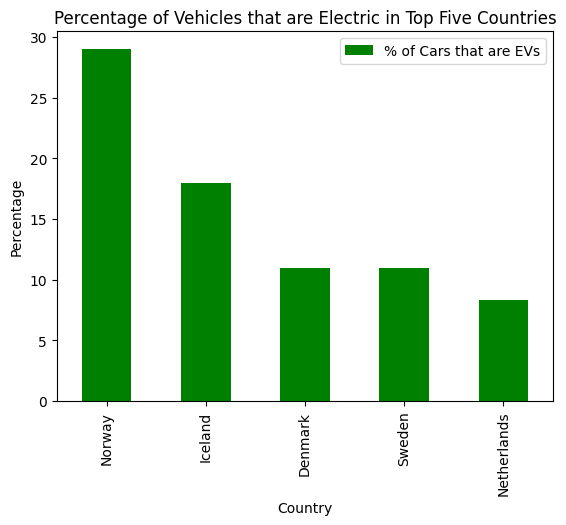

In [53]:
# Create a list and a bar graph of the top 5 Countries
top_5_countries = ev_data_2023.head()
top_5_country_list = top_5_countries['Country'].tolist()

top_5_countries.plot(kind='bar',
                     x='Country', y='% of Cars that are EVs',
                     title='Percentage of Vehicles that are Electric in Top Five Countries',
                     ylabel='Percentage',
                     color ='g')
plt.show()

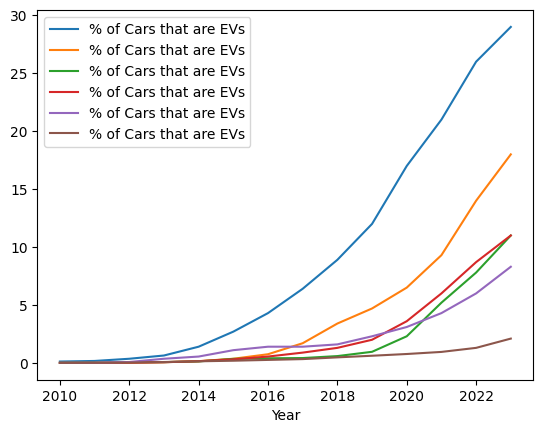

In [54]:
#plotting the top 5 countries with the highest percentage of EV's
fig, ax = plt.subplots()

ev_df.loc[ev_df['Country']=='Norway'].plot(ax=ax, label="Norway")
ev_df.loc[ev_df['Country']=='Iceland'].plot(ax=ax, label='Iceland')
ev_df.loc[ev_df['Country']=='Denmark'].plot(ax=ax, label='Denmark')
ev_df.loc[ev_df['Country']=='Sweden'].plot(ax=ax, label='Sweden')
ev_df.loc[ev_df['Country']=='Netherlands'].plot(ax=ax, label='Netherlands')

ev_df.loc[ev_df['Country']=='United States'].plot(ax=ax, label='United States')

plt.show()

In [57]:
# Create a data frame for the oil consumption data
oil_con_df = pd.read_csv("US_Norway_MotorOilConsumption.csv")
oil_con_df = oil_con_df.set_index('Year')
oil_con_df=oil_con_df.rename(columns={'Value': 'Oil Consumed'})

# Set up data in oil_con_df to match ev_df
oil_con_df['Country'] = oil_con_df['Country'].replace('US', 'United States')
display(oil_con_df.head())
display(oil_con_df.tail())


,Types of Consumption,Oil Consumed,Units,Country
Year,,,,
2000,Motor gasoline,15198795.0,TJ,United States
2001,Motor gasoline,15399971.0,TJ,United States
2002,Motor gasoline,15783775.0,TJ,United States
2003,Motor gasoline,15826438.0,TJ,United States
2004,Motor gasoline,16089453.0,TJ,United States


,Types of Consumption,Oil Consumed,Units,Country
Year,,,,
2017,Motor gasoline,32912.0,TJ,Norway
2018,Motor gasoline,31679.0,TJ,Norway
2019,Motor gasoline,29129.0,TJ,Norway
2020,Motor gasoline,27586.0,TJ,Norway
2021,Motor gasoline,25636.0,TJ,Norway


In [58]:
# merge the dfs

merged_df = pd.merge(ev_df, oil_con_df, on=['Country', 'Year'], how='outer')
merged_df = merged_df.dropna()
merged_df

,Country,% of Cars that are EVs,Types of Consumption,Oil Consumed,Units
Year,,,,,
2010,Norway,0.1200,Motor gasoline,51122.0,TJ
2011,Norway,0.1700,Motor gasoline,46643.0,TJ
2012,Norway,0.3600,Motor gasoline,43667.0,TJ
2013,Norway,0.6400,Motor gasoline,40777.0,TJ
2014,Norway,1.4000,Motor gasoline,38975.0,TJ
2015,Norway,2.7000,Motor gasoline,35943.0,TJ
2016,Norway,4.3000,Motor gasoline,33815.0,TJ
2017,Norway,6.4000,Motor gasoline,32912.0,TJ
2018,Norway,8.9000,Motor gasoline,31679.0,TJ


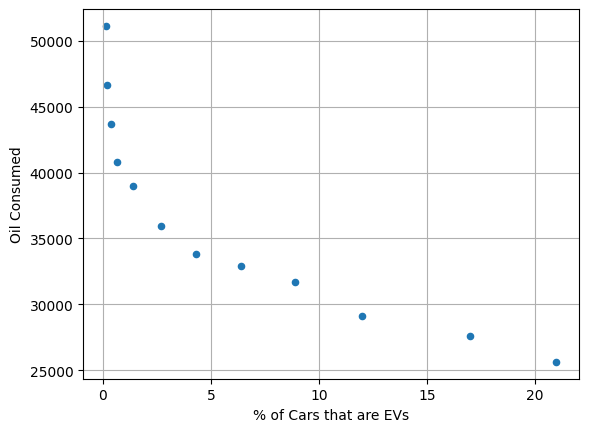

<Figure size 640x480 with 0 Axes>

In [60]:

# Plot the data for Norway
merged_df.loc[merged_df['Country']=='Norway'].plot(kind='scatter', x='% of Cars that are EVs', y='Oil Consumed', grid=True)

plt.show()
plt.tight_layout()

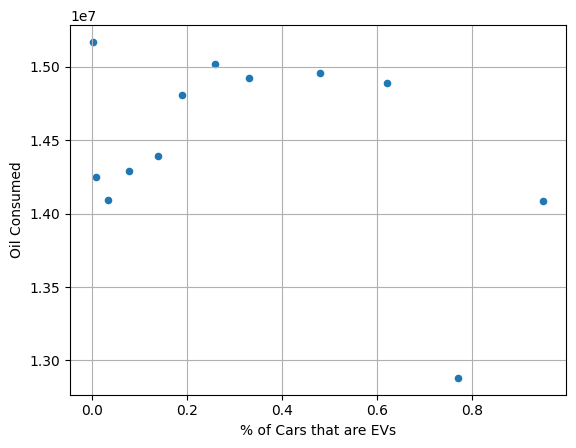

<Figure size 640x480 with 0 Axes>

In [59]:
#plot the data for the United States
merged_df.loc[merged_df['Country']=='United States'].plot(kind='scatter', x='% of Cars that are EVs', y='Oil Consumed', grid=True)

plt.show()
plt.tight_layout()
